In [35]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [36]:
# read the dataset and load into a pandas dataframe
data = pd.read_csv("./flood_dataset.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [37]:
# checking the shape of the dataset
print("Rows in dataset: ",data.shape[0])
print("Columns in dataset: ",data.shape[1])

Rows in dataset:  118
Columns in dataset:  16


In [38]:
# checking if there is any missing value in the data
data.isnull().sum()

SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL_RAINFALL    0
FLOODS             0
dtype: int64

In [39]:
# replacing Yes and No with 1 and 0 respectively
data["FLOODS"].replace(["YES","NO"],[1,0], inplace=True)

In [40]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL_RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


## Data Splitting

In [41]:
# Dropping column SUBDIVISION, ANNUAL_RAINFALL since it does not have a correlation with target variable
data.drop(columns=["SUBDIVISION","ANNUAL_RAINFALL"],inplace=True)
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0


In [42]:
# Splitting the data into dependent variables(X) and the required target valiable(Y)
X = data.iloc[:,0:13]
Y = data["FLOODS"]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

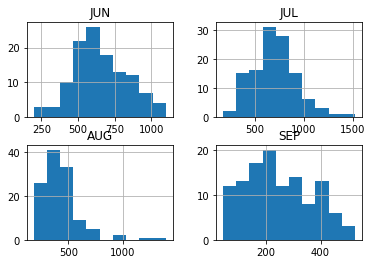

In [43]:
# checking the distribution of data by plotting a histogram
# checking for only the months falling under the rainy season because only these months are prone to floods
X.iloc[:,6:10].hist()
plt.show()

## Data Normalization

In [44]:
# Since the is not distributed evenly, we can scale it in the range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X).transform(X)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

## Train Test Splitting

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

## Predicting Results and Comparing Models

In [46]:
# Loading the models
logistic = LogisticRegression(solver="liblinear", random_state=42)
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)
KNN = KNeighborsClassifier()

In [47]:
# Training the model on the training sets
model1 = logistic.fit(X_train, Y_train)
model2 = random_forest.fit(X_train, Y_train)
model3 = KNN.fit(X_train, Y_train)

In [48]:
Y_pred1 = model1.predict(X_test)

In [49]:
Y_pred2 = model2.predict(X_test)

In [50]:
Y_pred3 = model3.predict(X_test)

In [51]:
# Comparing the accuracy score of all the three models
print("\t\tACCURACY SCORES")
print("Logistic Regression: ",accuracy_score(Y_test,Y_pred1))
print("Random Forest Regressor: ",accuracy_score(Y_test,Y_pred2))
print("K-Nearest Neighbour(KNN): ",accuracy_score(Y_test,Y_pred3))

		ACCURACY SCORES
Logistic Regression:  0.9583333333333334
Random Forest Regressor:  0.7083333333333334
K-Nearest Neighbour(KNN):  0.9166666666666666


## From the above results, Logistic Regression is the best model for flood prediction.
Prediction of flood before-hand by analysing the rainfall in different months helps us in getting ready for the flood in advance. So this will help in reducing the after effects of flood and will help in flood management.

In [52]:
# Exporting the models
import joblib
joblib.dump(model1,'Logistic_Regression.joblib')
joblib.dump(model2,'Random_Forest_Regressor.joblib')
joblib.dump(model3,'KNearestNeighbour.joblib')

['KNearestNeighbour.joblib']

## Loading the model
we can load the "model_name.joblib" file by importing the joblib library then,
> model = joblib.load('model_name.joblib')

To make predictions using the model, we can pass a numpy nd-array to the loaded model as,
> predictions = model_loaded.predict([[YEAR,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEP,OCT,NOV,DEV], [..], .....)

In [57]:
# Using the Logistic Regression Model to predict
model = joblib.load("./Logistic_Regression.joblib")
prediction = model.predict([[2008, 0.8, 30.3, 217.2, 108.4, 81.2, 469.9, 505.1, 349, 347, 343.4, 55.4, 17]])
if prediction == 1:
    print("YES, There maybe a flood")
else:
    print("NO, There may not be a flood")

NO, There may not be a flood
